## Ionospheric Plasma Blobs Data Analysis

In [ ]:
# Import the necessary modules
# You may need to install "viresclient" module if you don't already have it
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.dates import DateFormatter
request = SwarmRequest()
%matplotlib inline

### IPD Data Retrieval

In [ ]:
# Pull out IPD dataset out of others
request.available_measurements("IPD")

In [ ]:
# Request data from satellite of your choice "SW_OPER_IPDA(or C, B)IRR_2F"
# Indicate the period
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
df1 = request.get_between(
    dt.datetime(2019,8,15, 18,1,30),
    dt.datetime(2019,8,15, 20,4,58)
)

# request.set_collection("SW_OPER_IPDCIRR_2F")
# request.set_products(measurements=request.available_measurements("IPD"))
# df2 = request.get_between(
#     dt.datetime(2015,3,3, 18),
#     dt.datetime(2015,3,4, 4)
# )

In [ ]:
# Slice out the variables you are interested in for your research
needed_data1 = df1[['Longitude','Latitude','Background_Ne','Ne', 'Grad_Ne_at_20km',
                        'Te', 'ROD', 'delta_Ne10s', 'IPIR_index', 'Ionosphere_region_flag']]        # Blobs

### Data Analysis and Visualization
#### Blob Electron Density Cases

In [ ]:
plt.figure(figsize=(7,3))
# plt.plot(needed_data1['Latitude'], needed_data1['Background_Ne']/100000,
#          'b--', label='Background_Ne')
plt.plot(needed_data1['Latitude'], needed_data1['Ne']/100000, color='red', label= 'Ne')
#plt.title('EPBs, Alpha (A) over Nigeria, February 15 2019, 21:23 hr (LT)',
          #fontweight='bold', fontsize=10)
plt.xlabel('GLAT ($^{o}$)', fontsize=12, fontweight='bold')
plt.ylabel('Ne $x$ 10$^{5}$ (cm$^{-3}$)', fontweight='bold')
plt.title('15/8/2019, 19:01:30 - 19:04:59 hr (LT),\n Alpha(A), Orbit No: 32191, GLON: 8.10$^{o}$N',
          fontweight='bold', fontsize=10)
plt.legend(loc='upper right', ncol=2, fontsize=12)
plt.grid()
plt.annotate("Plasma Blob", xy=(10.3, 1.10), xytext=(7.6, 1.12),
            arrowprops=dict(facecolor='black', linewidth = 2, arrowstyle="->"), fontweight='bold')
# plt.annotate('Satellite\nDirection', xy=(19, 3.5), xytext=(21.2, 3.5),
#             arrowprops=dict(facecolor='black', shrink=0), fontweight='bold')
#plt.savefig(".../Blob_1582019.tiff", bbox_inches='tight')
plt.show()

#### Panel Plots

In [ ]:
fi, axe = plt.subplots(7, sharex=True, figsize=(7,8))

axe[0].plot(needed_data1['Latitude'], needed_data1['Ne']/100000, '-', lw=1, label='Ne', color='red')
axe[0].plot(needed_data1['Latitude'], needed_data1['Background_Ne']/100000, '--', lw=1, label='Background_Ne', color='blue')
axe[0].set_title('Plasma Blob Without Small-Scale Fluctuations Over Nigeria, Alpha (A)\nOrbit Number: 29616, 1/3/2019, 21:52:35 - 21:55:50 hr (LT),\n Centroid GLON: 9.92$^{o}$ N',
                 fontsize=10, fontweight='bold')
axe[0].set_ylabel('[cm$^{-3}$]x10$^{5}$', fontsize=8, fontweight='bold')
axe[0].text(3.0, 4.20, "$(a)$", fontweight='bold', bbox=dict(facecolor='red', alpha=0.2))


# axe[1].plot(needed_data5['Latitude'], needed_data5['Ne']/100000, '.-', markersize=3, lw=0.7, label='Ne (Spacecraft: C)', color='green')
# axe[1].plot(needed_data5['Latitude'], needed_data5['Background_Ne']/100000, '.-', markersize=3, lw=0.7, label='Background_Ne', color='blue')

axe[1].plot(needed_data1['Latitude'], needed_data1['Te']/1000, '-',
            markersize=3, lw=1, label='Te', color='black')
#axe[1].plot(needed_data5['Latitude'], needed_data5['Te'], '.-',
#markersize=3, lw=0.7, label='Te (Spacecraft: C)', color='black')
axe[1].set_ylabel('[K]x10$^{3}$', fontsize=8, fontweight='bold')
axe[1].text(3.0, 1.395, "$(b)$", fontweight='bold', bbox=dict(facecolor='red', alpha=0.2))

axe[2].plot(needed_data1['Latitude'], needed_data1['Ionosphere_region_flag'], '-',
            markersize=3, lw=1, label='Ionosphere_region_flag', color='brown')
axe[2].text(3.0, 0.03, "$(c)$", fontweight='bold', bbox=dict(facecolor='red', alpha=0.2))

axe[3].plot(needed_data1['Latitude'], needed_data1['IPIR_index'], '-',
            markersize=3, lw=1, label='IPIR_index', color='green')
axe[3].text(3.0, 3.8, "$(d)$", fontweight='bold', bbox=dict(facecolor='red', alpha=0.2))

axe[4].plot(needed_data1['Latitude'], needed_data1['Grad_Ne_at_20km'], '-',
            markersize=3, lw=1, label='Grad_Ne_at_20km', color='m')
axe[4].set_ylabel('[cm$^{-3}$/m]', fontsize=8, fontweight='bold')
axe[4].text(3.0, 0.13, "$(e)$", fontweight='bold', bbox=dict(facecolor='red', alpha=0.2))

axe[5].plot(needed_data1['Latitude'], needed_data1['delta_Ne10s']/1000, '-',
            markersize=3, lw=1, label='delta_Ne10s', color='y')
axe[5].set_ylabel('[cm$^{-3}$]x10$^{3}$', fontsize=8, fontweight='bold')
axe[5].text(3.0, 3.35, "$(f)$", fontweight='bold', bbox=dict(facecolor='red', alpha=0.2))

axe[6].plot(needed_data1['Latitude'], needed_data1['ROD']/1000, '-',
            markersize=3, lw=1, label='ROD', color='purple')
axe[6].set_xlabel('GLat($^{o}$)', fontweight='bold')
axe[6].set_ylabel('[cm$^{-3}$/s]x10$^{3}$', fontsize=8, fontweight='bold')
axe[6].text(3.0, 1.3, "$(g)$", fontweight='bold', bbox=dict(facecolor='red', alpha=0.2))
               
for ax in axe.flat:
    #ax.set(xlabel='GLat($^{o}$)', ylabel='Ne x 10$^{5}$(cm$^{-3}$)')
    #ax.label_outer()
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=8)
fi.subplots_adjust(hspace=0.1)
#plt.savefig('.../blob_no_SSFiI_132019.tiff', format='tiff', bbox_inches='tight')
plt.show()

#### Occurrence Pattern Plot

In [31]:
df = pd.read_excel('.../NASRDA/Blob_Avg_Data.xlsx')

In [32]:
df.head()

,Months,No_of_Obs,No_of_Cases,Avg_Centroid_Density,Avg_Blob_N_S_Ssize,Avg_GLAT,Avg_GLON,Occurrence rate (%)
0,January,3,1,98703.60,132.100,10.45,15.350,33.333333
1,February,15,2,250083.00,77.700,10.38,15.130,13.333333
2,March,17,4,343179.45,129.315,10.82,10.185,23.529412
3,April,1,0,0.00,0.000,0.00,0.000,0.000000
4,May,2,0,0.00,0.000,0.00,0.000,0.000000


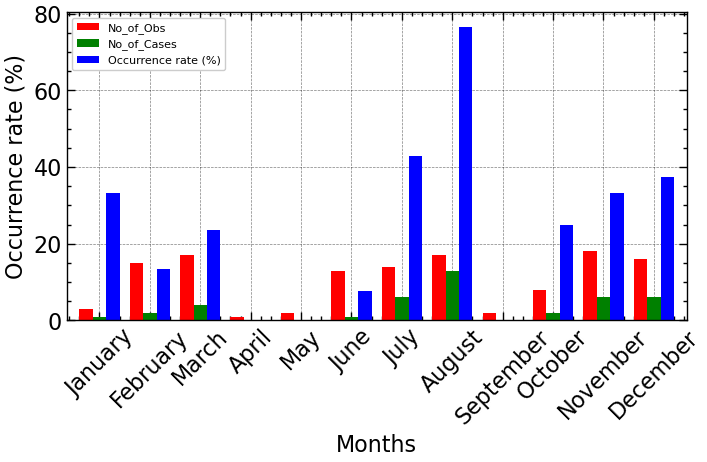

In [40]:
def bar_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'left')

df.plot(kind='bar', x='Months', y=['No_of_Obs', 'No_of_Cases', 'Occurrence rate (%)'],
        color=['red', 'green','blue'], figsize=(8,4), width=0.8)
#plt.ylim((0,25))
plt.xticks(rotation=45)
plt.ylabel('Occurrence rate (%)')
plt.legend(loc='upper left', fontsize=8)
#plt.savefig(r'.../NASRDA\Results/obs_by_cases.tiff', bbox_inches='tight')
plt.show()

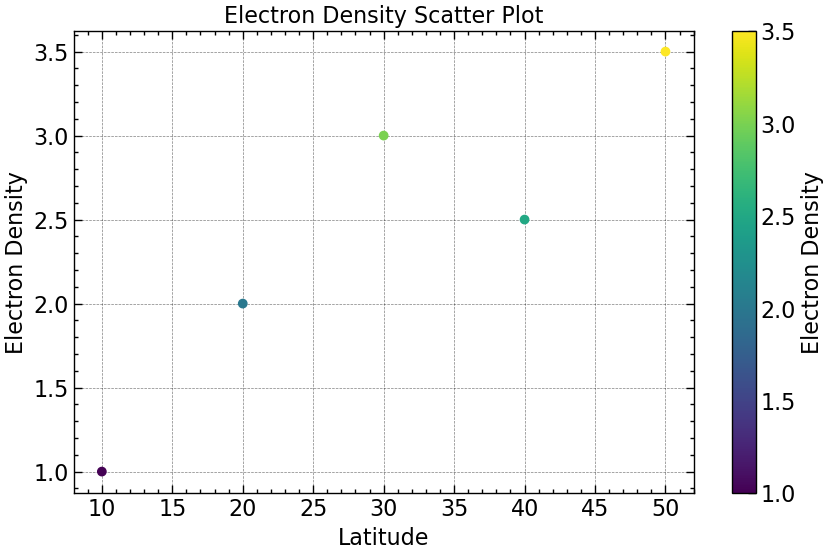

In [39]:
def plot_electron_density_scatter(data):
    # Extract electron density and latitude data from the DataFrame
    electron_density = data['electron_density'].values
    latitudes = data['latitude'].values

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(latitudes, electron_density, c=electron_density, cmap='viridis', marker='o')
    plt.colorbar(label='Electron Density')
    plt.xlabel('Latitude')
    plt.ylabel('Electron Density')
    plt.title('Electron Density Scatter Plot')
    plt.show()

# Example usage:
import pandas as pd

# Sample DataFrame
data = pd.DataFrame({
    'electron_density': [1.0, 2.0, 3.0, 2.5, 3.5],
    'latitude': [10, 20, 30, 40, 50]
})

plot_electron_density_scatter(data)